# Hot topics
The following code finds the hot topics for the different parties.

Made by: Elsa Kidman

## How to run

Required packages are:
- numpy
- pandas
- networkx
- matplotlib
- seaborn

## Questions and Answers

Question = "Skriftlig Fråga"

Answer = "Svar på skriftlig fråga"

In [2]:
import json
f = open('../../data/data_all/data_all_topic_final.json')
data_init = json.load(f)

In [3]:
import textwrap
import numpy as np
import pandas as pd
from datetime import datetime
from networkx.algorithms import bipartite
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data_init)
df['question_date'] = pd.to_datetime(df['question_date'])
df['regering'] = df['regering'].fillna(0).astype(int)
df = df[df['regering'] != 0] # Remove bad entries
df = df.reset_index(drop=True)

# The FP party changes name to L in 2015. However, it is considered the same party.
df['undertecknare_partibet'] = df['undertecknare_partibet'].replace('FP', 'L')
df['besvaradav_partibet'] = df['besvaradav_partibet'].replace('FP', 'L')

# Function to replace empty lists with empty strings
def replace_empty_list(lst):
    return '' if len(lst) == 0 else lst

# Apply the function to the specified column
df['top_10_words_answer'] = df['top_10_words_answer'].apply(replace_empty_list)


df.head()

,id_,question,question_date,answer,undertecknare_name,undertecknare_partibet,besvaradav_name,besvaradav_partibet,regering,id_topic_combined,top_10_words_combined,id_topic_question,top_10_words_question,id_topic_answer,top_10_words_answer
0,gx11839,\nden \r\n27 maj\nFråga \n2009/10:839 \r\nÖkat...,2010-05-27,\nden 2 juni\nSvar på fråga\n2009/10:839 Ökat ...,Karin Svensson Smith,MP,Åsa Torstensson,C,48,72,"cykling, motorcyklister, cyklister, elsparkcyk...",155,"cykling, elsparkcyklar, cyklister, cykla, omkö...",155,"cykling, elsparkcyklar, cyklister, cykla, omkö..."
1,gx11838,\nden \r\n26 maj\nFråga \n2009/10:838 \r\nFrys...,2010-05-26,\nden \r\n3 juni\nSvar på fråga\n2009/10:838 F...,Birgitta Eriksson,S,Beatrice Ask,M,48,4,"bankerna, finansiella, banker, finansinspektio...",94,"tullverket, brottslighet, stöldgods, brottsnät...",94,"tullverket, brottslighet, stöldgods, brottsnät..."
2,gx11837,\nden \r\n25 maj\nFråga \n2009/10:837 \r\nSver...,2010-05-25,\nden 4 juni\nSvar på fråga\n2009/10:837 Sveri...,Ameer Sachet,S,Ewa Björling,M,48,194,"epa, ceta, förhandlingarna, avs, avtalet, avs ...",148,"ceta, epa, förhandlingarna, avs, handelsavtal,...",4,"etiopien, västsahara, somaliland, somalia, fn,..."
3,gx11836,\nden \r\n25 maj\nFråga \n2009/10:836 \r\nSJ o...,2010-05-25,\nden 1 juni\nSvar på fråga\n2009/10:836 SJ oc...,Ameer Sachet,S,Maud Olofsson,C,48,0,"trafikverket, sj, eneroth, tomas eneroth, toma...",81,"tågtrafiken, trafikverket, tåg, elmsäter, cath...",282,"sj, sj ab, ab, tåg, resenärer, tågtrafik, bilj..."
4,gx11835,\nden \r\n24 maj\nFråga \n2009/10:835 \r\nAvrä...,2010-05-24,\nden 10 juni\nSvar på fråga\n2009/10:835 Avrä...,Helena Bargholtz,L,Carl Bildt,M,48,17,"iran, iranska, mänskliga, rättigheter, mänskli...",20,"iran, iranska, mänskliga, irans, rättigheter, ...",20,"iran, iranska, mänskliga, irans, rättigheter, ..."


In [4]:
reg = df['regering'].unique()
reg = np.sort(reg)
#print(reg)

# Divide the data by ruling parties
data_time = []
for i in reg:
  tmp = df[(df['regering'] == i)]
  tmp = tmp.reset_index(drop=True)
  data_time.append(tmp)


# Divide the data by year
grouped_by_year = df.groupby(df['question_date'].dt.year)
years= []
dfs_by_year = {}
data_years = []

for year, group_df in grouped_by_year:
  data_years.append(group_df)
  dfs_by_year[year] = group_df
  years.append(year)


In [5]:
  # Count how many people ask Questions, answers for each party.
  parties = df['undertecknare_partibet'].unique()
  party_counts_comb = []
  party_counts_q = []
  party_counts_a = []
  for df in data_years:
    all_parties = pd.concat([df['undertecknare_partibet'], df['besvaradav_partibet']])
    party = all_parties.value_counts()
    party_counts_comb.append(party)

    party_q = df['undertecknare_partibet'].value_counts()
    party_counts_q.append(party_q)

    party_a = df['besvaradav_partibet'].value_counts()
    party_a = party_a.reindex(parties, fill_value=0)

    party_counts_a.append(party_a)

In [6]:
# Get the topics with the highest mean over the years. This is just done to get some interessting topics
lst =[]
counts_list_q = []
counts_list_a = []
counts_list_combined = []

for data in data_years:

  counts_q = data['top_10_words_question'].value_counts()
  counts_list_q.append(counts_q)

  counts_a = data['top_10_words_answer'].value_counts()
  counts_list_a.append(counts_a)

  counts_combined = data['top_10_words_combined'].value_counts()
  counts_list_combined.append(counts_combined)

result_q = pd.concat(counts_list_q, axis=1, keys=range(1, len(data_years)+1))
mean_counts_q = result_q.mean(axis=1)

result_a = pd.concat(counts_list_a, axis=1, keys=range(1, len(data_years)+1))
mean_counts_a = result_a.mean(axis=1)

result_combined = pd.concat(counts_list_combined, axis=1, keys=range(1, len(data_years)+1))
mean_counts_combined = result_combined.mean(axis=1)

result_qa = result_q.add(result_a, fill_value=0)
mean_counts_qa = result_qa.mean(axis=1)


In [34]:
counts_list_a[0]

elever, skolan, lärare, utbildning, utbildningsminister, skolor, utbildningen, skolverket, björklund, jan björklund                                                                      33
bostäder, bostadsmarknaden, hyresrätter, bostad, bostadsbyggandet, boverket, bostadsbyggande, odell, mats odell, statsrådet mats                                                         17
etiopien, västsahara, somaliland, somalia, fn, marocko, humanitära, kongo, utrikesminister, utrikesminister carl                                                                         12
djur, hundar, veterinärer, jordbruksverket, djurskydd, djuren, eskil erlandsson, erlandsson, eskil, djurskyddet                                                                          12
migrationsverket, asylsökande, uppehållstillstånd, afghanistan, migrationsverkets, morgan johansson, morgan, justitie, migrationsminister, migrationsminister morgan                     11
                                                            

In [7]:
# Counts the occurances of a topic for each party.
def get_topic_count_parties_years(df, data_years, column):
  topic_count_S = []
  topic_count_MP = []
  topic_count_V = []
  topic_count_C = []
  topic_count_L = []
  topic_count_M = []
  topic_count_KD = []
  topic_count_SD = []
  topic_count_none = []


  for df in data_years:
    topic_count_S.append(df[(df['undertecknare_partibet'] == 'S')][column].value_counts().sort_values(ascending=False))
    topic_count_MP.append(df[(df['undertecknare_partibet'] == 'MP')][column].value_counts().sort_values(ascending=False))
    topic_count_V.append(df[(df['undertecknare_partibet'] == 'V')][column].value_counts().sort_values(ascending=False))
    topic_count_C.append(df[(df['undertecknare_partibet'] == 'C')][column].value_counts().sort_values(ascending=False))
    topic_count_L.append(df[((df['undertecknare_partibet'] == 'L') | (df['undertecknare_partibet'] == 'FP'))][column].value_counts().sort_values(ascending=False))
    topic_count_M.append(df[(df['undertecknare_partibet'] == 'M')][column].value_counts().sort_values(ascending=False))
    topic_count_KD.append(df[(df['undertecknare_partibet'] == 'KD')][column].value_counts().sort_values(ascending=False))
    topic_count_SD.append(df[(df['undertecknare_partibet'] == 'SD')][column].value_counts().sort_values(ascending=False))
    topic_count_none.append(df[(df['undertecknare_partibet'] == '-')][column].value_counts().sort_values(ascending=False))

  return topic_count_S, topic_count_MP, topic_count_V, topic_count_C, topic_count_L, topic_count_M, topic_count_KD, topic_count_SD, topic_count_none

In [20]:
# A function that receives the topics desired from a specific party topic-count
# It considers that sometimes counts are zero both for a specific topic and for a party for a wole year.
# This could be because only the people in the ruling parties answers questions for example.
# It returns the share of how much a topic is spoken about by a party during a specific time.
def get_topic_count_party(topic_names, party_topic_count, party, party_counts):
  topics_count = {} # the list that contain each topic and the count: topic:count over the years

  # Iterate through the desired topics names
  for name in topic_names:
    tmp = {}
    count_topic = []

    for i, topic_party in enumerate(party_topic_count):
      topic_name_party = topic_party.index.tolist() # Get the topic in the topic-count series

      if name in topic_name_party and party_counts[i][party] != 0: # For each topic in the topic count series for the party
        index = topic_name_party.index(name)
        # We need to divide the specific topic-count by the total topics-counts made by that party in the same time
        total = party_counts[i][party]
        value = topic_party[index] / total
        count_topic.append(value)

      else:
        count_topic.append(0)

    topics_count[name] = count_topic

  return topics_count

## Hot topics over the years
### Questions

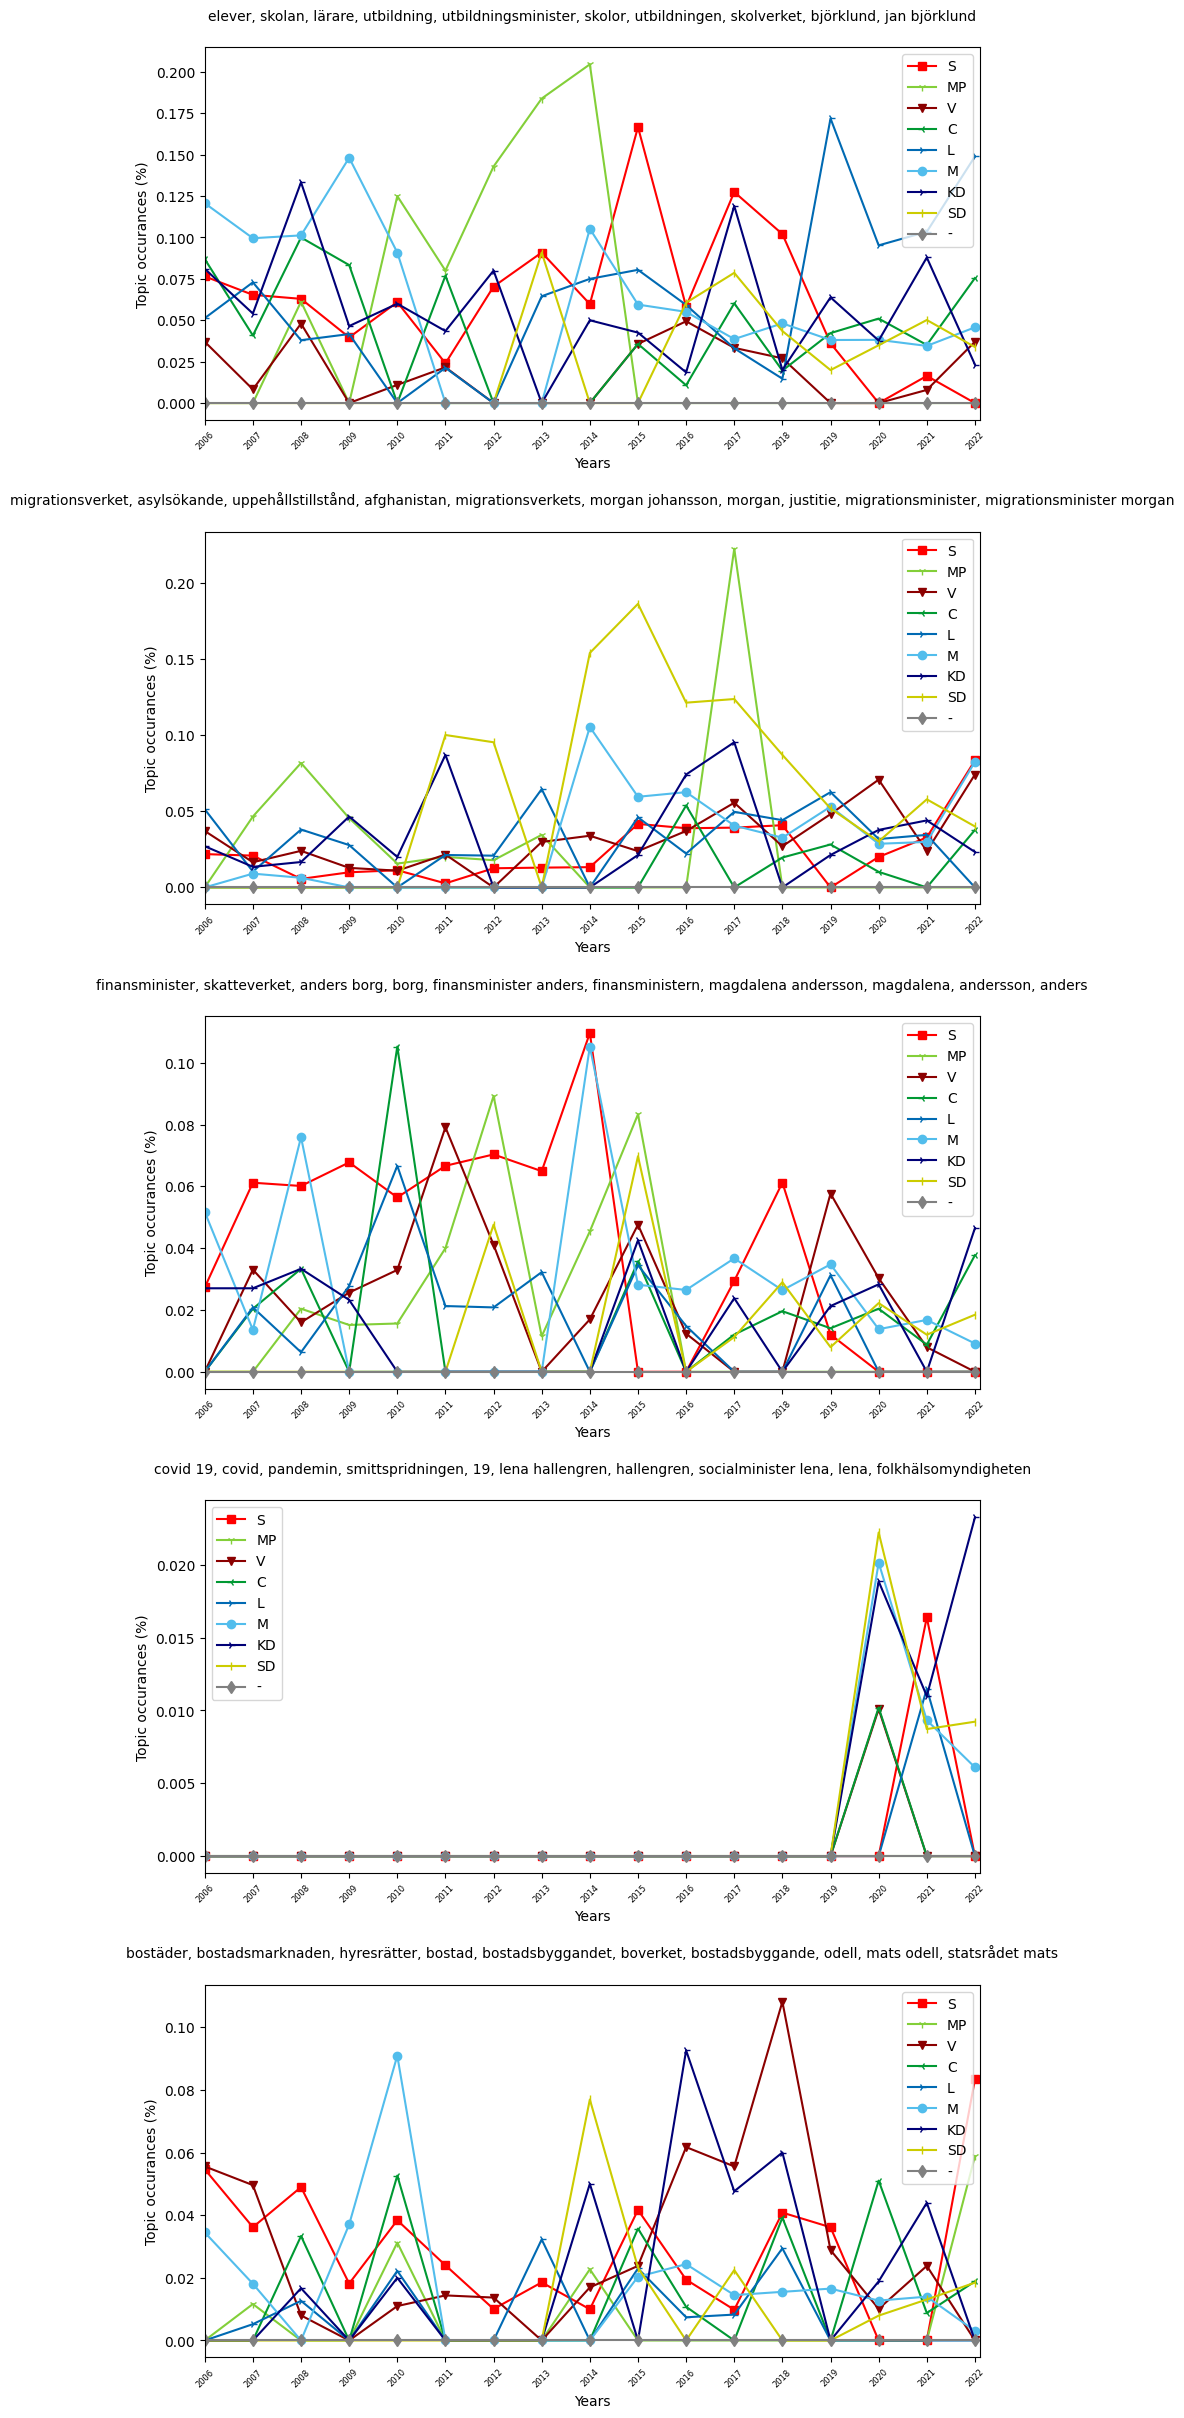

In [44]:
# Get the topic count for each party for the desired column
topic_S, topic_MP, topic_V, topic_C, topic_L, topic_M, topic_KD, topic_SD, topic_none = get_topic_count_parties_years(df, data_years, 'top_10_words_question')


# Get the top n topics. These are the topics with the highest mean over the years. However, a specified topic can be choosen to.
top_n_topics = list(mean_counts_q.nlargest(5).index)

# Get the counts from each party for the desired topics
S = get_topic_count_party(top_n_topics, topic_S, 'S', party_counts_q)
MP = get_topic_count_party(top_n_topics, topic_MP, 'MP', party_counts_q)
V = get_topic_count_party(top_n_topics, topic_V, 'V', party_counts_q)
C = get_topic_count_party(top_n_topics, topic_C, 'C', party_counts_q)
L = get_topic_count_party(top_n_topics, topic_L, 'L', party_counts_q)
M = get_topic_count_party(top_n_topics, topic_M, 'M', party_counts_q)
KD = get_topic_count_party(top_n_topics, topic_KD, 'KD', party_counts_q)
SD = get_topic_count_party(top_n_topics, topic_SD, 'SD', party_counts_q)
none = get_topic_count_party(top_n_topics, topic_none, '-', party_counts_q)

fig, axs = plt.subplots(len(MP), 1, figsize=(10, 6 * len(MP)))

#fig.subplots_adjust(wspace=1, hspace=0.5)
#fig.suptitle("Hot topics", y=0.9, fontsize = 18)

for i in range(len(MP)):

  x = range(0,17,1)
  axs[i].plot(x, S[top_n_topics[i]], marker='s', color="red", label="S") # color="#E8112d"
  axs[i].plot(x, MP[top_n_topics[i]], marker='1', color="#83CF39", label="MP")
  axs[i].plot(x, V[top_n_topics[i]], marker='v', color="darkred", label="V") # color="#DA291C"
  axs[i].plot(x, C[top_n_topics[i]], marker='3', color="#009933", label="C")
  axs[i].plot(x, L[top_n_topics[i]], marker='4', color="#006AB3", label="L")
  axs[i].plot(x, M[top_n_topics[i]], marker='o', color="#52BDEC", label="M")
  axs[i].plot(x, KD[top_n_topics[i]], marker='4', color="#000077", label="KD")
  axs[i].plot(x, SD[top_n_topics[i]], marker='|', color="#cccc00", label="SD")
  axs[i].plot(x, none[top_n_topics[i]],marker='d', color="gray", label="-")

  axs[i].set_xlabel("Years")
  axs[i].set_ylabel("Topic occurances (%)")
  axs[i].set_xticks(range(17), years, rotation=45, fontsize=6)
  axs[i].set_xlim(0, 16.1)
  axs[i].set_title(top_n_topics[i], y=1.05, fontsize=10)
  axs[i].legend()

plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()
plt.show()

### Answers

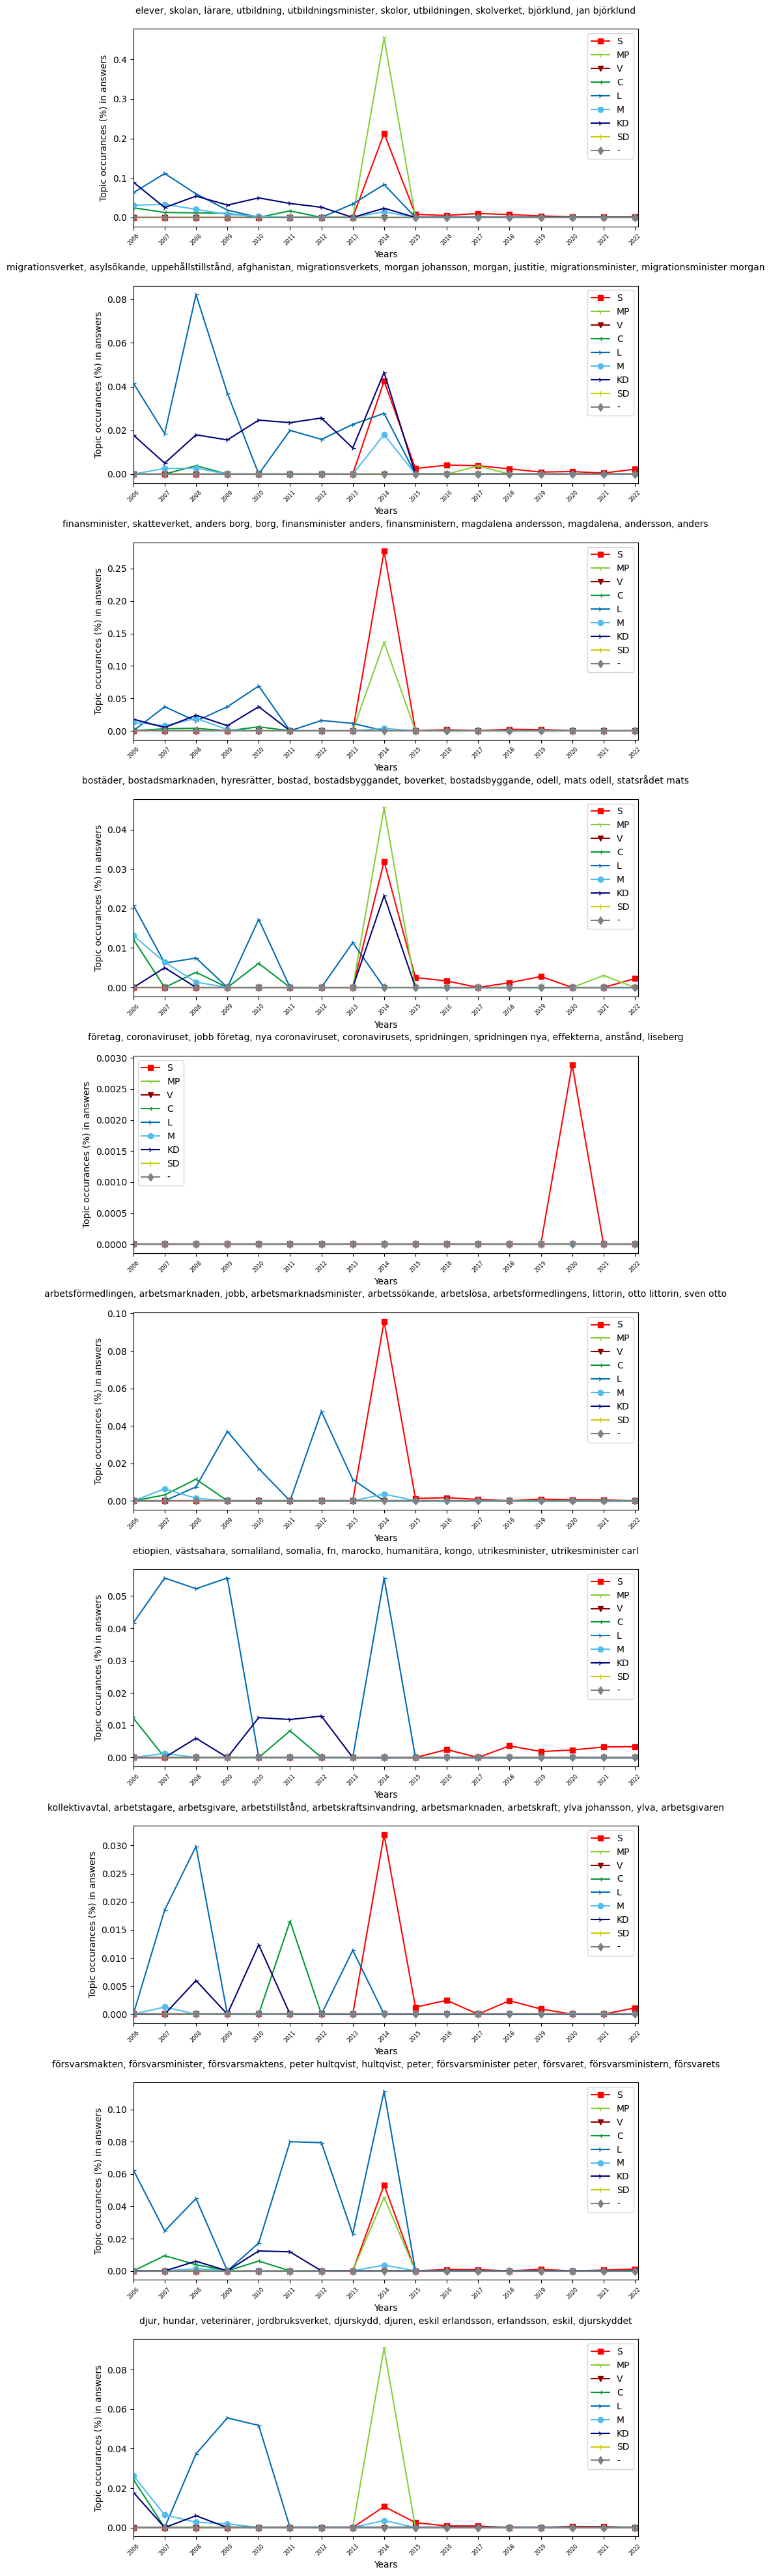

In [46]:
# Get the topic count for each party for the desired column
topic_S_a, topic_MP_a, topic_V_a, topic_C_a, topic_L_a, topic_M_a, topic_KD_a, topic_SD_a, topic_none_a = get_topic_count_parties_years(df, data_years, 'top_10_words_answer')

# Get the top n topics. These are the topics with the highest mean over the years. However, a specified topic can be choosen to.
n=10
top_n_topics = list(mean_counts_qa.nlargest(n).index)

# Get the counts from each party for the desired topics
S = get_topic_count_party(top_n_topics, topic_S_a, 'S', party_counts_a)
MP = get_topic_count_party(top_n_topics, topic_MP_a, 'MP', party_counts_a)
V = get_topic_count_party(top_n_topics, topic_V_a, 'V', party_counts_a)
C = get_topic_count_party(top_n_topics, topic_C_a, 'C', party_counts_a)
L = get_topic_count_party(top_n_topics, topic_L_a, 'L', party_counts_a)
M = get_topic_count_party(top_n_topics, topic_M_a, 'M', party_counts_a)
KD = get_topic_count_party(top_n_topics, topic_KD_a, 'KD', party_counts_a)
SD = get_topic_count_party(top_n_topics, topic_SD_a, 'SD', party_counts_a)
none = get_topic_count_party(top_n_topics, topic_none_a, '-', party_counts_a)

fig, axs = plt.subplots(n, 1, figsize=(10, 5 * len(MP)))

#fig.subplots_adjust(wspace=1, hspace=0.5)
#fig.suptitle("Hot topics", y=0.9, fontsize = 18)

for i in range(len(MP)):

  x = range(0,17,1)
  axs[i].plot(x, S[top_n_topics[i]], marker='s', color="red", label="S") # color="#E8112d"
  axs[i].plot(x, MP[top_n_topics[i]], marker='1', color="#83CF39", label="MP")
  axs[i].plot(x, V[top_n_topics[i]], marker='v', color="darkred", label="V") # color="#DA291C"
  axs[i].plot(x, C[top_n_topics[i]], marker='3', color="#009933", label="C")
  axs[i].plot(x, L[top_n_topics[i]], marker='4', color="#006AB3", label="L")
  axs[i].plot(x, M[top_n_topics[i]], marker='o', color="#52BDEC", label="M")
  axs[i].plot(x, KD[top_n_topics[i]], marker='4', color="#000077", label="KD")
  axs[i].plot(x, SD[top_n_topics[i]], marker='|', color="#cccc00", label="SD")
  axs[i].plot(x, none[top_n_topics[i]],marker='d', color="gray", label="-")

  axs[i].set_xlabel("Years")
  axs[i].set_ylabel("Topic occurances (%) in answers")
  axs[i].set_xticks(range(17), years, rotation=45, fontsize=6)
  axs[i].set_xlim(0, 16.1)
  axs[i].set_title(top_n_topics[i], y=1.05, fontsize=10)
  axs[i].legend()

plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()
plt.show()

### Combined

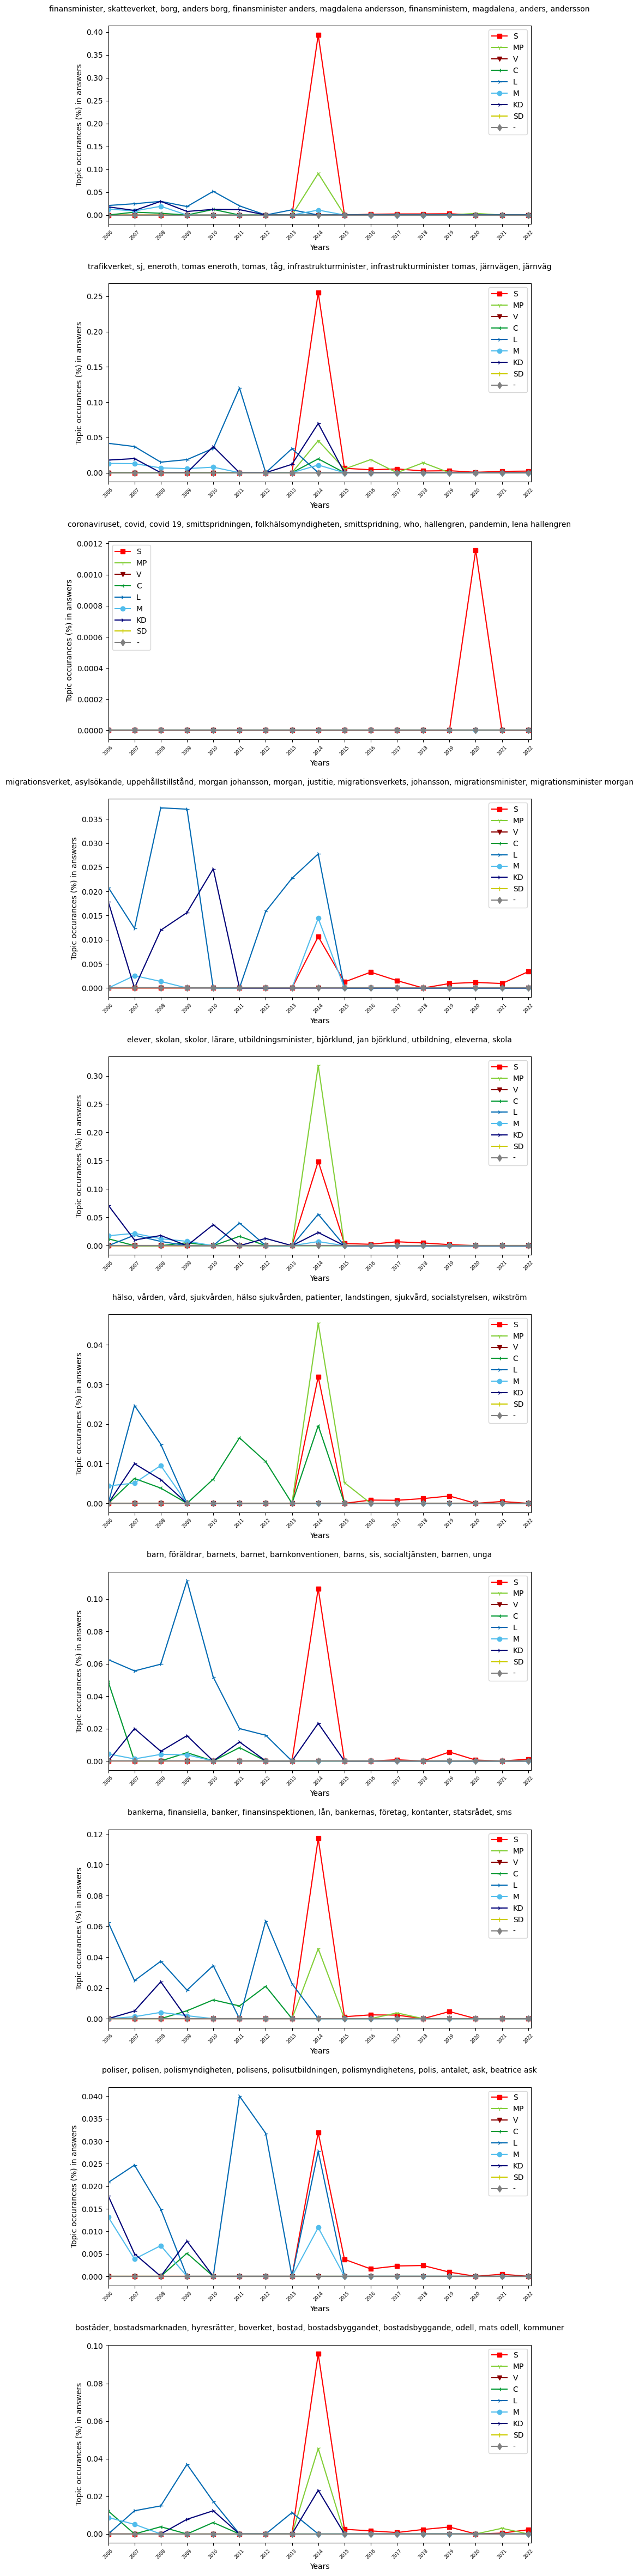

In [47]:
# Get the topic count for each party for the desired column
topic_S_c, topic_MP_c, topic_V_c, topic_C_c, topic_L_c, topic_M_c, topic_KD_c, topic_SD_c, topic_none_c = get_topic_count_parties_years(df, data_years, 'top_10_words_combined')

# Get the top n topics. These are the topics with the highest mean over the years. However, a specified topic can be choosen to.
n=10
top_n_topics = list(mean_counts_combined.nlargest(n).index)

# Get the counts from each party for the desired topics
S = get_topic_count_party(top_n_topics, topic_S_c, 'S', party_counts_a)
MP = get_topic_count_party(top_n_topics, topic_MP_c, 'MP', party_counts_a)
V = get_topic_count_party(top_n_topics, topic_V_c, 'V', party_counts_a)
C = get_topic_count_party(top_n_topics, topic_C_c, 'C', party_counts_a)
L = get_topic_count_party(top_n_topics, topic_L_c, 'L', party_counts_a)
M = get_topic_count_party(top_n_topics, topic_M_c, 'M', party_counts_a)
KD = get_topic_count_party(top_n_topics, topic_KD_c, 'KD', party_counts_a)
SD = get_topic_count_party(top_n_topics, topic_SD_c, 'SD', party_counts_a)
none = get_topic_count_party(top_n_topics, topic_none_c, '-', party_counts_a)

fig, axs = plt.subplots(len(MP), 1, figsize=(10, 6 * len(MP)))

#fig.subplots_adjust(wspace=1, hspace=0.5)
#fig.suptitle("Hot topics", y=0.9, fontsize = 18)

for i in range(len(MP)):

  x = range(0,17,1)
  axs[i].plot(x, S[top_n_topics[i]], marker='s', color="red", label="S") # color="#E8112d"
  axs[i].plot(x, MP[top_n_topics[i]], marker='1', color="#83CF39", label="MP")
  axs[i].plot(x, V[top_n_topics[i]], marker='v', color="darkred", label="V") # color="#DA291C"
  axs[i].plot(x, C[top_n_topics[i]], marker='3', color="#009933", label="C")
  axs[i].plot(x, L[top_n_topics[i]], marker='4', color="#006AB3", label="L")
  axs[i].plot(x, M[top_n_topics[i]], marker='o', color="#52BDEC", label="M")
  axs[i].plot(x, KD[top_n_topics[i]], marker='4', color="#000077", label="KD")
  axs[i].plot(x, SD[top_n_topics[i]], marker='|', color="#cccc00", label="SD")
  axs[i].plot(x, none[top_n_topics[i]],marker='d', color="gray", label="-")

  axs[i].set_xlabel("Years")
  axs[i].set_ylabel("Topic occurances (%) in answers")
  axs[i].set_xticks(range(17), years, rotation=45, fontsize=6)
  axs[i].set_xlim(0, 16.1)
  axs[i].set_title(top_n_topics[i], y=1.05, fontsize=10)
  axs[i].legend()

plt.subplots_adjust(hspace=0.3)
#plt.tight_layout()
plt.show()